## Random Walk Model

The **random walk** is a fundamental and widely used time series model, often applied in finance to represent stock prices and other economic indicators. The idea behind the random walk is that the value of the process at time $t$ is the sum of its value at time $t-1$ and a random shock (or noise). Essentially, each step of the process is unpredictable and governed by randomness.

Mathematically, the random walk model is represented as:

$$
X_t = X_{t-1} + Z_t
$$

Where:

- $X_t$ is the value of the process at time $t$ (e.g., the stock price today).
- $X_{t-1}$ is the value at the previous time step (e.g., the stock price yesterday).
- $Z_t$ is a **white noise** term, typically assumed to follow a normal distribution $Z_t \sim \mathcal{N}(\mu, \sigma^2)$, with mean $\mu$ and variance $\sigma^2$.

### Evolution of a Random Walk Over Time

To better understand how a random walk evolves, we can expand the model over time. Starting at $X_0 = 0$, we have:

$$
X_1 = Z_1
$$

$$
X_2 = Z_1 + Z_2
$$

$$
X_3 = Z_1 + Z_2 + Z_3
$$

$$
X_t = \sum_{i=1}^{t} Z_i
$$

In general, the value at time $t$, $X_t$, is the cumulative sum of all past shocks $Z_1, Z_2, \dots, Z_t$. This means that the random walk retains the effects of all previous shocks, making it highly dependent on its past values.

### Mean and Variance of a Random Walk

The key properties of a random walk are its **mean** and **variance**. Since each step $Z_t$ is a random shock with its own distribution, the behavior of the entire random walk can be derived from the properties of the shocks.

#### Expected Value

The expected value $E[X_t]$ gives us the average or mean value of $X_t$ over time. Since $Z_t \sim \mathcal{N}(\mu, \sigma^2)$, the expected value of each shock $Z_t$ is $E[Z_t] = \mu$. Therefore, the expected value of $X_t$ at any time $t$ is:

$$
E[X_t] = E\left[\sum_{i=1}^{t} Z_i\right] = \sum_{i=1}^{t} E[Z_i] = \mu t
$$

This shows that the expected value of a random walk grows linearly with time $t$ if $\mu \neq 0$. When $\mu = 0$, the random walk has no trend, and its expected value remains 0.

#### Variance

The variance $\text{Var}(X_t)$ measures the spread or uncertainty of $X_t$ at time $t$. Since the variance of each shock $Z_t$ is $\sigma^2$, and the shocks are assumed to be independent, the variance of the sum of shocks is the sum of their variances:

$$
\text{Var}(X_t) = \text{Var}\left(\sum_{i=1}^{t} Z_i\right) = \sum_{i=1}^{t} \text{Var}(Z_i) = \sigma^2 t
$$

This means that the variance of a random walk increases linearly with time, implying that the uncertainty around $X_t$ grows as $t$ increases. The longer the random walk progresses, the more dispersed the values become.

### Simulation of a Random Walk in Python

A **random walk** is a type of stochastic process where each value in the sequence is determined by the previous value plus a random shock. This concept can be useful in various fields such as finance (for modeling stock prices), physics (for modeling particle movements), or statistics (as a time series model). Simulating a random walk in Python is straightforward, as we iteratively add random shocks to calculate each successive value. 

The basic model for a random walk is:

$$
X_t = X_{t-1} + Z_t
$$

where:
- $X_t$ is the value of the random walk at time step $t$,
- $X_{t-1}$ is the value of the random walk at the previous time step,
- $Z_t$ represents a random shock at time $t$, typically drawn from a normal distribution $\mathcal{N}(0, 1)$.

This means that each new value of the random walk is determined by adding a random shock $Z_t$ to the current value. The random walk typically starts at some initial value (often $X_0 = 0$).

### Simulation Example

The following Python code demonstrates how to simulate and plot a random walk using **NumPy** for 
generating the random shocks and **Matplotlib** for visualization.

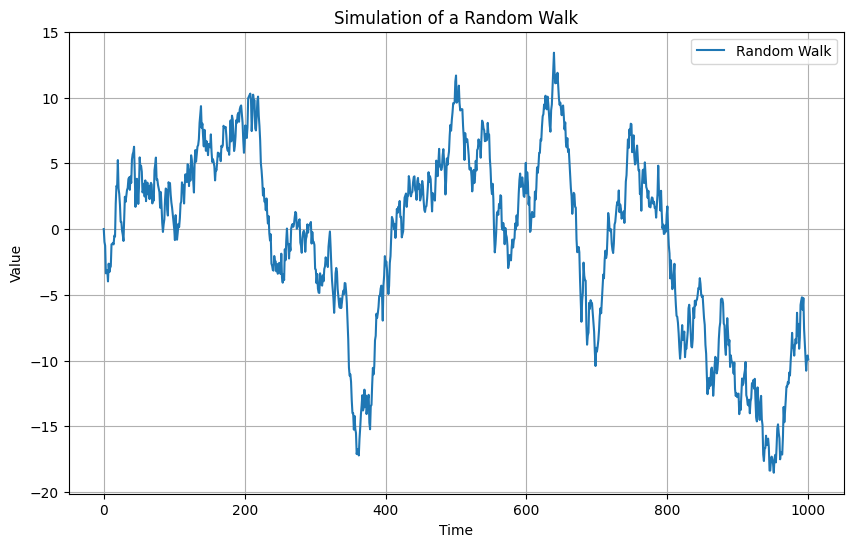

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Number of steps in the random walk
N = 1000

# Generate white noise (Z_t ~ N(0, 1))
Z = np.random.normal(loc=0, scale=1, size=N)

# Initialize the random walk (X_0 = 0)
X = np.cumsum(np.insert(Z, 0, 0))  # Insert X_0 = 0 and compute cumulative sum

# Plot the random walk
plt.figure(figsize=(10, 6))
plt.plot(X, label='Random Walk')
plt.title('Simulation of a Random Walk')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

Explanation:

1. The array `Z` represents the sequence of random shocks $Z_t$ drawn from a normal distribution $\mathcal{N}(0, 1)$. This sequence of shocks has a mean of 0 and a standard deviation of 1, making it "white noise"—a series of uncorrelated random variables.
2. The cumulative sum of `Z` is used to create the random walk. The `np.cumsum()` function calculates the cumulative sum of the array, giving the values $X_t$ for each time step. The function `np.insert(Z, 0, 0)` adds the initial value $X_0 = 0$ at the start.
3. We then plot the random walk, where the x-axis represents time and the y-axis represents the value of the walk at each step.

Here is an example plot of the random walk:

<img src="r1.png">

### Autocorrelation of the Random Walk

Autocorrelation measures how a time series is correlated with its past values. A random walk typically exhibits **high autocorrelation** because each step is dependent on the previous step. We can visualize the autocorrelation function (ACF) of the random walk using `statsmodels`.

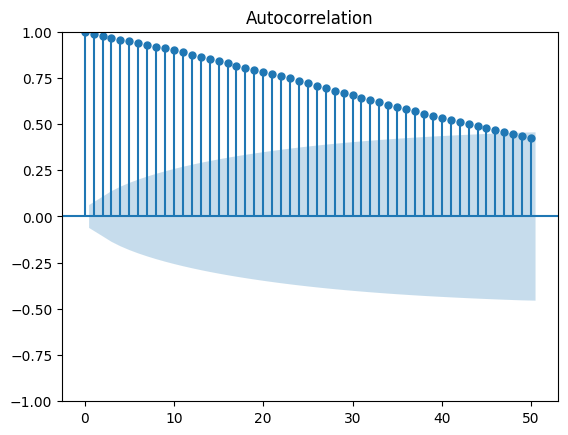

In [3]:

from statsmodels.graphics.tsaplots import plot_acf

# Plot the autocorrelation function (ACF)
plot_acf(X, lags=50)
plt.show()

The autocorrelation plot typically shows strong correlations for several lags, reflecting the memory of the process. An example of the ACF plot is shown below:

<img src="r2.png">

### Removing the Trend with the Difference Operator

A random walk has a **trend** due to the cumulative nature of the process. Even if the random shocks have zero mean, the variance of the process increases over time, making it **non-stationary**. A stationary process has a constant mean and variance over time, and its autocorrelation function decays quickly. To transform the random walk into a stationary process, we can apply the **difference operator**.

The **difference operator** is defined as:

$$
\Delta X_t = X_t - X_{t-1} = Z_t
$$

Applying this operation to a random walk removes the trend, as each differenced value corresponds to the original random shocks $Z_t$. This transformation yields a series of white noise.

### Differencing in Python

We can use `numpy.diff()` to difference the random walk:

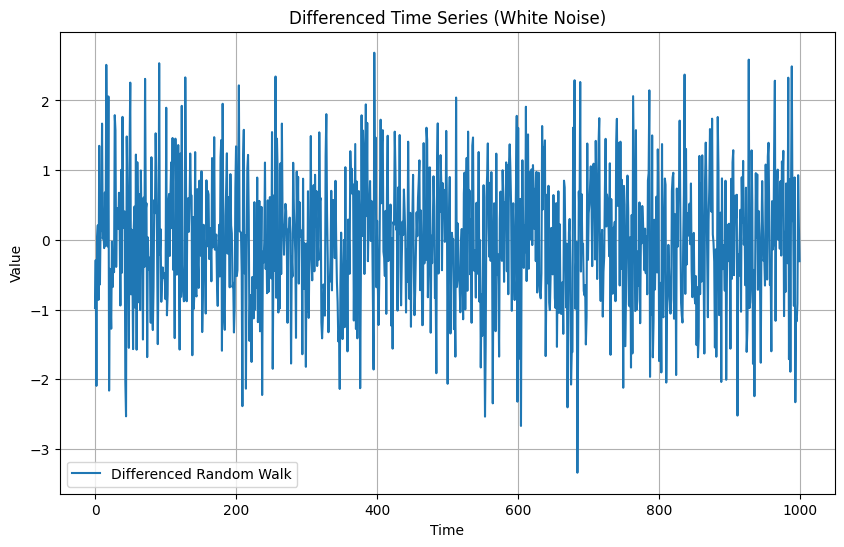

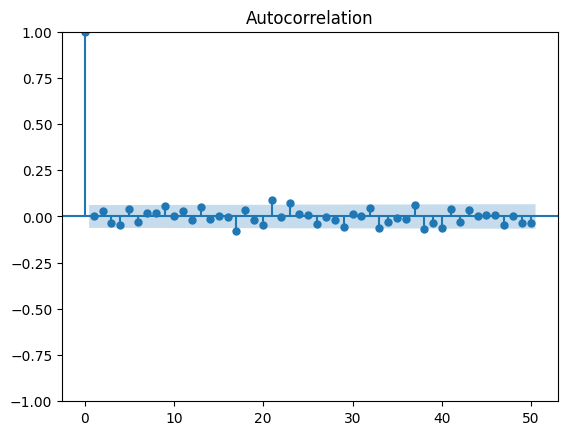

In [4]:
# Difference the random walk to remove the trend
diff_X = np.diff(X)

# Plot the differenced time series
plt.figure(figsize=(10, 6))
plt.plot(diff_X, label='Differenced Random Walk')
plt.title('Differenced Time Series (White Noise)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# Plot the autocorrelation function (ACF) of the differenced series
plot_acf(diff_X, lags=50)
plt.show()

Explanation:

1. The `np.diff()` function calculates the differences between consecutive values in the `X` array, effectively applying the difference operator $\Delta X_t$. The resulting series, `diff_X`, represents the original random shocks $Z_t$, which are white noise.
2. After differencing, we plot the new series to visualize the transformation. The plot shows random fluctuations around zero, which is characteristic of white noise.
3. The autocorrelation function of the differenced series should show no significant correlations at any lag, as the differenced process is now white noise with no memory of previous values.

Here is an example plot of the differenced random walk:

<img src="r3.png">

And the ACF plot for the differenced series:

<img src="r4.png">

### Correlogram of a Random Walk

The **Autocorrelation Function (ACF)** of a random walk provides important insights into its structure. Since each value in a random walk is highly dependent on its previous value (and indirectly on all past values), the autocorrelation at lower lags tends to be very high. The ACF of a random walk decays slowly, indicating **non-stationarity**. 

Specifically:

- The autocorrelation at lag 1 is typically close to 1.
- The autocorrelation decreases gradually at higher lags but remains significant.

Once we apply the difference operator, the ACF of the differenced series becomes close to zero for all lags, confirming that the differenced series is now **stationary white noise**.
